In [1]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import *

In [7]:
# Define base paths
base_path = '../'
eeg_path = os.path.join(base_path, 'EEG')
ecg_path = os.path.join(base_path, 'ECG')
eda_path = os.path.join(base_path, 'EDA')
gaze_path = os.path.join(base_path, 'Gaze')
labels_path = os.path.join(base_path, 'Labels')

def load_data(eeg_path):
    """Load all EEG data"""
    eeg_data = []
    for participant_folder in os.listdir(eeg_path):
        participant_dir = os.path.join(eeg_path, participant_folder)
        for file in glob.glob(os.path.join(participant_dir, '*.csv')):
            filename = os.path.basename(file).replace('.csv', '')
            level = filename[-1]
            df = pd.read_csv(file)
            df['Participant'] = participant_folder
            df['Level'] = int(level)
            df['Baseline'] = 'baseline' in filename
            eeg_data.append(df)
    return pd.concat(eeg_data, ignore_index=True)


def load_labels_data(labels_path):
    """Load all Labels data, extracting Participant ID from filenames"""
    labels_data = []
    for file in glob.glob(os.path.join(labels_path, '*.csv')):
        participant_id = os.path.basename(file).replace('.csv', '')
        df = pd.read_csv(file)
        df['Participant'] = participant_id
        labels_data.append(df)
    return pd.concat(labels_data, ignore_index=True)

In [10]:
gaze_data = load_data(gaze_path)
gaze_data['Timestamp'] = gaze_data['Timestamp'].astype(float)

In [35]:
gaze_data['Gaze Y'].max()

1080.0

In [11]:
labels_data = load_labels_data(labels_path)

In [12]:
labels_data.head(5)

,time,lvl_1,lvl_2,lvl_3,lvl_4,lvl_5,lvl_6,lvl_7,lvl_8,lvl_9,Participant
0,10,2.0,3,4,3.0,5.0,5.0,6.0,6.0,7.0,1030
1,20,2.0,3,5,5.0,6.0,5.0,7.0,7.0,8.0,1030
2,30,3.0,4,6,6.0,6.0,5.0,7.0,8.0,8.0,1030
3,40,2.0,3,6,6.0,6.0,5.0,8.0,8.0,8.0,1030
4,50,2.0,3,6,6.0,6.0,5.0,7.0,8.0,8.0,1030


In [26]:
test['Fixation X']

1271375    528.502924
1271408    528.502924
1271430    528.502924
1271452    528.502924
1271474    528.502924
              ...    
1277078    890.797386
1277099    890.797386
1277121    890.797386
1277144    890.797386
1277164    890.797386
Name: Fixation X, Length: 248, dtype: float64

In [29]:
test = gaze_data[(gaze_data['Participant'] == '1030') & (gaze_data['Level'] == 1) & (gaze_data['Baseline'] == False)& (gaze_data['ET_PupilLeft'].isnull() == False)]
# & (gaze_data['Timestamp'] > 120)& (gaze_data['Timestamp'] < 125)

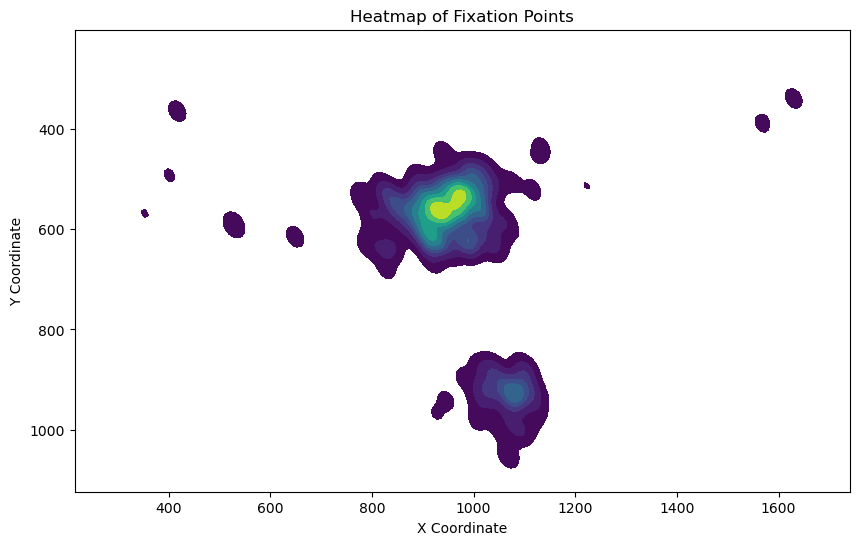

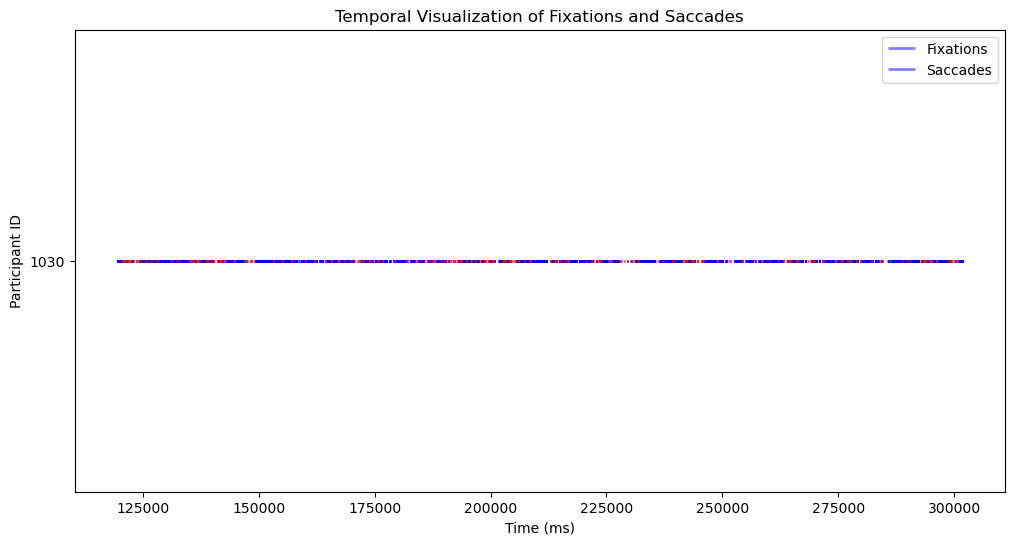

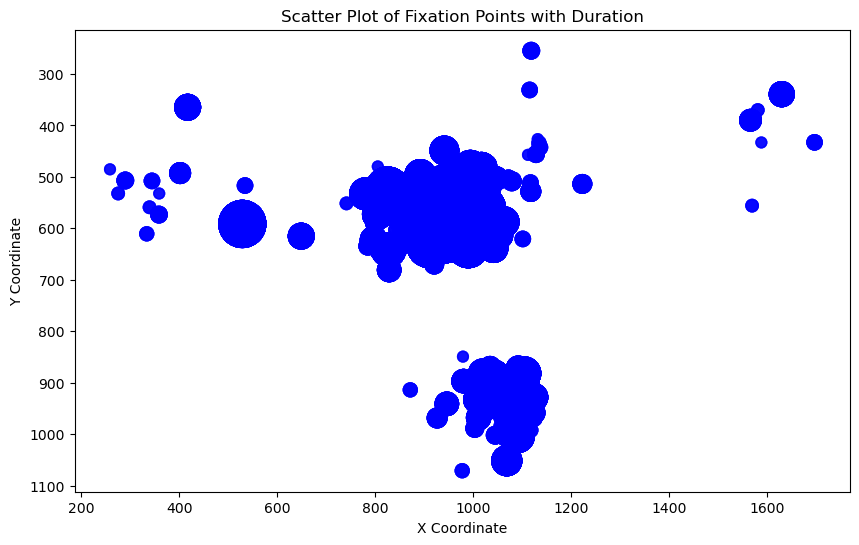

In [30]:
fixation_data = test.dropna(subset=['Fixation X', 'Fixation Y', 'Fixation Duration'])
saccade_data = test.dropna(subset=['Saccade Start', 'Saccade End'])

# 1. Heatmap of Fixation Points (Corrected without Colorbar)
plt.figure(figsize=(10, 6))
heatmap = sns.kdeplot(
    x=fixation_data['Fixation X'],
    y=fixation_data['Fixation Y'],
    cmap='viridis', fill=True, bw_adjust=0.5
)
plt.title('Heatmap of Fixation Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.gca().invert_yaxis()  # Invert y-axis to match typical screen coordinates
plt.show()

# 2. Temporal Visualization of Fixations and Saccades (Corrected Line Plot)
plt.figure(figsize=(12, 6))

# Plot fixations as horizontal bars
for _, row in fixation_data.iterrows():
    plt.hlines(y=row['Participant'], xmin=row['Fixation Start'], xmax=row['Fixation End'], color='blue', alpha=0.5, linewidth=2)

# Plot saccades as horizontal bars
for _, row in saccade_data.iterrows():
    plt.hlines(y=row['Participant'], xmin=row['Saccade Start'], xmax=row['Saccade End'], color='red', alpha=0.5, linewidth=2)

plt.title('Temporal Visualization of Fixations and Saccades')
plt.xlabel('Time (ms)')
plt.ylabel('Participant ID')
plt.legend(['Fixations', 'Saccades'], loc='upper right')
plt.show()

# 3. Scatter Plot of Fixation Points with Duration (Corrected)
plt.figure(figsize=(10, 6))
plt.scatter(
    fixation_data['Fixation X'],
    fixation_data['Fixation Y'],
    s=fixation_data['Fixation Duration'],  # Size of point represents fixation duration
    alpha=0.6,
    color='blue'
)
plt.title('Scatter Plot of Fixation Points with Duration')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.gca().invert_yaxis()  # Invert y-axis to match typical screen coordinates
plt.show()


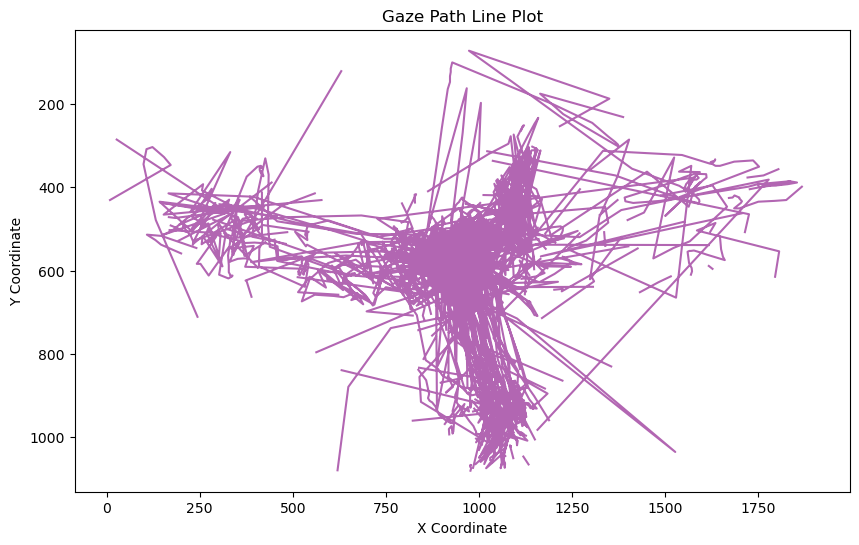

C:\Users\hughq\AppData\Local\Temp\ipykernel_30916\707173664.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  blink_data = test[gaze_data['Blink detected (binary)'] == 1]


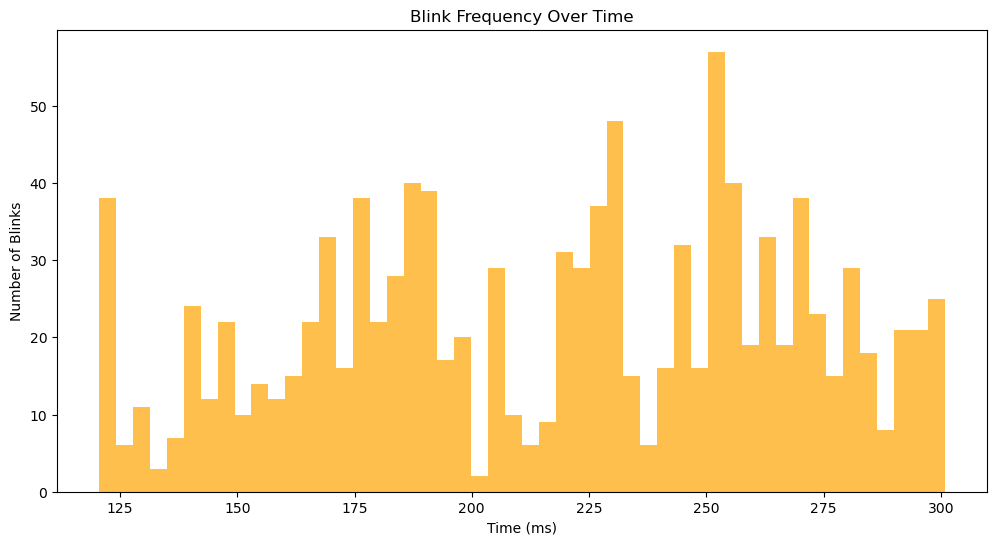

In [12]:
# 4. Gaze Path Line Plot
# Creating a line plot to visualize the gaze path using 'Gaze X' and 'Gaze Y' coordinates

plt.figure(figsize=(10, 6))
plt.plot(test['Gaze X'], test['Gaze Y'], color='purple', alpha=0.6)
plt.title('Gaze Path Line Plot')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.gca().invert_yaxis()  # Invert y-axis to match typical screen coordinates
plt.show()

# 5. Blink Frequency Over Time
# Creating a bar plot of blink frequency using the 'Blink detected (binary)' column

# Extracting the timestamps and corresponding blink detection
gaze_data['Blink detected (binary)'] = test['Blink detected (binary)'].fillna(0)  # Replace NaN with 0
blink_data = test[gaze_data['Blink detected (binary)'] == 1]

plt.figure(figsize=(12, 6))
plt.hist(blink_data['Timestamp'], bins=50, color='orange', alpha=0.7)
plt.title('Blink Frequency Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Number of Blinks')
plt.show()


In [20]:
# Creating a copy of the dataset to work with feature extraction
gaze_features = test.copy()

# Sampling frequency is 50 Hz, we will extract features in 10-second windows (500 samples per window)
window_size = 500  

# Initialize lists to store extracted features
feature_data = []

# Iterating through the dataset in windows of 500 samples (10 seconds)
for start in range(0, len(gaze_features), window_size):
    # Define the window
    window = gaze_features[start:start + window_size]

    # Check if the window is complete (contains 500 samples)
    if len(window) < window_size:
        break
    
    # Extracting features for the window

    # Pupil Size Features
    avg_pupil_left = window['ET_PupilLeft'].mean()
    avg_pupil_right = window['ET_PupilRight'].mean()
    std_pupil_left = window['ET_PupilLeft'].std()
    std_pupil_right = window['ET_PupilRight'].std()

    # Gaze Position Features
    avg_gaze_x = window['Gaze X'].mean()
    avg_gaze_y = window['Gaze Y'].mean()
    std_gaze_x = window['Gaze X'].std()
    std_gaze_y = window['Gaze Y'].std()

    # Fixation Features
    avg_fixation_duration = window['Fixation Duration'].dropna().mean() if 'Fixation Duration' in window else 0
    fixation_count = window['Fixation Duration'].dropna().count()

    # Saccade Features
    avg_saccade_amplitude = window['Saccade Amplitude'].dropna().mean() if 'Saccade Amplitude' in window else 0
    avg_saccade_velocity = window['Saccade Peak Velocity'].dropna().mean() if 'Saccade Peak Velocity' in window else 0
    saccade_count = window['Saccade Amplitude'].dropna().count()

    # Blink Features
    blink_count = window['Blink detected (binary)'].sum()

    # Append extracted features as a dictionary
    feature_data.append({
        'avg_pupil_left': avg_pupil_left,
        'avg_pupil_right': avg_pupil_right,
        'std_pupil_left': std_pupil_left,
        'std_pupil_right': std_pupil_right,
        'avg_gaze_x': avg_gaze_x,
        'avg_gaze_y': avg_gaze_y,
        'std_gaze_x': std_gaze_x,
        'std_gaze_y': std_gaze_y,
        'avg_fixation_duration': avg_fixation_duration,
        'fixation_count': fixation_count,
        'avg_saccade_amplitude': avg_saccade_amplitude,
        'avg_saccade_velocity': avg_saccade_velocity,
        'saccade_count': saccade_count,
        'blink_count': blink_count
    })

# Convert feature data into a DataFrame for easy handling
feature_df = pd.DataFrame(feature_data)



In [34]:
test

,Timestamp,ET_PupilLeft,ET_PupilRight,ET_GazeLeftx,ET_GazeLefty,ET_GazeRightx,ET_GazeRighty,ET_Gaze3DX,ET_Gaze3DY,ET_Gaze3DZ,...,Saccade Duration,Saccade Amplitude,Saccade Peak Velocity,Saccade Peak Acceleration,Saccade Peak Deceleration,Saccade Direction,Participant,Level,Baseline,Blink Group
1271375,120.049,3.62,3.35,527.0,575.0,527.0,575.0,220.410004,-3.390000,564.409973,...,NaN,NaN,NaN,NaN,NaN,NaN,1030,1,False,1
1271408,120.069,3.61,3.37,524.0,578.0,524.0,578.0,213.240005,-4.950000,543.409973,...,NaN,NaN,NaN,NaN,NaN,NaN,1030,1,False,1
1271430,120.089,3.62,3.38,524.0,581.0,524.0,581.0,207.320007,-5.970000,527.549988,...,NaN,NaN,NaN,NaN,NaN,NaN,1030,1,False,1
1271452,120.109,3.63,3.38,525.0,583.0,525.0,583.0,201.660004,-6.860000,514.140015,...,NaN,NaN,NaN,NaN,NaN,NaN,1030,1,False,1
1271474,120.129,3.64,3.40,522.0,589.0,522.0,589.0,188.860001,-9.080000,479.049988,...,NaN,NaN,NaN,NaN,NaN,NaN,1030,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484770,301.741,3.85,5.00,847.0,681.0,847.0,681.0,74.139999,-64.650002,673.349976,...,NaN,NaN,NaN,NaN,NaN,NaN,1030,1,False,373
1484791,301.761,3.85,5.00,851.0,686.0,851.0,686.0,71.260002,-67.279999,673.320007,...,NaN,NaN,NaN,NaN,NaN,NaN,1030,1,False,373
1484812,301.781,3.85,5.00,854.0,689.0,854.0,689.0,69.589996,-69.440002,673.239990,...,NaN,NaN,NaN,NaN,NaN,NaN,1030,1,False,373
1484833,301.801,3.85,3.57,849.0,708.0,849.0,708.0,62.990002,-70.080002,586.169983,...,NaN,NaN,NaN,NaN,NaN,NaN,1030,1,False,373


In [36]:
window_size = 500  

# Initialize lists to store extracted features
feature_data = []

# Iterating through the dataset in windows of 500 samples (10 seconds)
for start in range(0, len(test), window_size):
    # Define the window
    gaze_data = test[start:start + window_size]

    # Check if the window is complete (contains 500 samples)
    if len(gaze_data) < window_size:
        break


    features_summary = {}

    features_summary['Pupil Diameter Max'] = gaze_data[['ET_PupilLeft', 'ET_PupilRight']].max().max()
    features_summary['Pupil Diameter Min'] = gaze_data[['ET_PupilLeft', 'ET_PupilRight']].min().min()
    features_summary['Pupil Diameter Mean'] = gaze_data[['ET_PupilLeft', 'ET_PupilRight']].mean().mean()

    # Blink Count and Duration (max, mean)
    blinks = gaze_data[gaze_data['Blink detected (binary)'] == 1]
    features_summary['Blink Count'] = len(blinks)

    # To calculate Blink Duration, we need to group consecutive blinks
    gaze_data['Blink Group'] = (gaze_data['Blink detected (binary)'] != gaze_data['Blink detected (binary)'].shift()).cumsum()
    blink_durations = gaze_data[gaze_data['Blink detected (binary)'] == 1].groupby('Blink Group')['Timestamp'].agg(lambda x: x.max() - x.min())
    features_summary['Blink Duration Max'] = blink_durations.max() if not blink_durations.empty else 0
    features_summary['Blink Duration Mean'] = blink_durations.mean() if not blink_durations.empty else 0

    # Fixation Count, Duration (max, min, mean), Dispersion (max, min, mean)
    fixations = gaze_data.dropna(subset=['Fixation Start', 'Fixation End'])
    features_summary['Fixation Count'] = len(fixations)

    fixation_durations = fixations['Fixation End'] - fixations['Fixation Start']
    features_summary['Fixation Duration Max'] = fixation_durations.max()
    features_summary['Fixation Duration Min'] = fixation_durations.min()
    features_summary['Fixation Duration Mean'] = fixation_durations.mean()

    features_summary['Fixation Dispersion Max'] = fixations['Fixation Dispersion'].max()
    features_summary['Fixation Dispersion Min'] = fixations['Fixation Dispersion'].min()
    features_summary['Fixation Dispersion Mean'] = fixations['Fixation Dispersion'].mean()

    # Saccade Count, Duration (max, min, mean), Amplitude (max, min, mean), Peak Velocity (max, min, mean),
    # Peak Acceleration (max, min, mean), Peak Deceleration (max, min, mean), Direction (max, min, mean)
    saccades = gaze_data.dropna(subset=['Saccade Start', 'Saccade End'])
    features_summary['Saccade Count'] = len(saccades)

    saccade_durations = saccades['Saccade End'] - saccades['Saccade Start']
    features_summary['Saccade Duration Max'] = saccade_durations.max()
    features_summary['Saccade Duration Min'] = saccade_durations.min()
    features_summary['Saccade Duration Mean'] = saccade_durations.mean()

    features_summary['Saccade Amplitude Max'] = saccades['Saccade Amplitude'].max()
    features_summary['Saccade Amplitude Min'] = saccades['Saccade Amplitude'].min()
    features_summary['Saccade Amplitude Mean'] = saccades['Saccade Amplitude'].mean()

    features_summary['Saccade Peak Velocity Max'] = saccades['Saccade Peak Velocity'].max()
    features_summary['Saccade Peak Velocity Min'] = saccades['Saccade Peak Velocity'].min()
    features_summary['Saccade Peak Velocity Mean'] = saccades['Saccade Peak Velocity'].mean()

    features_summary['Saccade Peak Acceleration Max'] = saccades['Saccade Peak Acceleration'].max()
    features_summary['Saccade Peak Acceleration Min'] = saccades['Saccade Peak Acceleration'].min()
    features_summary['Saccade Peak Acceleration Mean'] = saccades['Saccade Peak Acceleration'].mean()

    features_summary['Saccade Peak Deceleration Max'] = saccades['Saccade Peak Deceleration'].max()
    features_summary['Saccade Peak Deceleration Min'] = saccades['Saccade Peak Deceleration'].min()
    features_summary['Saccade Peak Deceleration Mean'] = saccades['Saccade Peak Deceleration'].mean()

    features_summary['Saccade Direction Max'] = saccades['Saccade Direction'].max()
    features_summary['Saccade Direction Min'] = saccades['Saccade Direction'].min()
    features_summary['Saccade Direction Mean'] = saccades['Saccade Direction'].mean()

    feature_data.append(features_summary)
    
feature_df = pd.DataFrame(feature_data)

C:\Users\hughq\AppData\Local\Temp\ipykernel_30916\1222640132.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaze_data['Blink Group'] = (gaze_data['Blink detected (binary)'] != gaze_data['Blink detected (binary)'].shift()).cumsum()
C:\Users\hughq\AppData\Local\Temp\ipykernel_30916\1222640132.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaze_data['Blink Group'] = (gaze_data['Blink detected (binary)'] != gaze_data['Blink detected (binary)'].shift()).cumsum()
C:\Users\hughq\AppData\Local\Temp\ipyk

In [38]:
feature_df

,Pupil Diameter Max,Pupil Diameter Min,Pupil Diameter Mean,Blink Count,Blink Duration Max,Blink Duration Mean,Fixation Count,Fixation Duration Max,Fixation Duration Min,Fixation Duration Mean,...,Saccade Peak Velocity Mean,Saccade Peak Acceleration Max,Saccade Peak Acceleration Min,Saccade Peak Acceleration Mean,Saccade Peak Deceleration Max,Saccade Peak Deceleration Min,Saccade Peak Deceleration Mean,Saccade Direction Max,Saccade Direction Min,Saccade Direction Mean
0,5.00,3.00,4.15288,54,0.159,0.087900,303,1139.0,140.0,639.726073,...,155.010926,7041.104049,140.758875,2517.894663,-577.187226,-6324.204488,-2237.237040,359.904188,4.274160,182.628100
1,5.00,2.46,3.94004,12,0.060,0.014286,358,1719.0,60.0,799.520950,...,171.048289,4994.119733,311.160238,3336.216224,-14.597232,-5559.625047,-3384.048801,345.486450,2.429764,181.816083
2,5.00,2.73,4.00579,59,0.260,0.097900,237,960.0,60.0,526.388186,...,199.698599,23871.871351,2.338721,4348.580711,-132.337943,-11849.801727,-3986.413411,359.507145,2.429764,172.060365
3,5.00,3.04,4.13121,34,0.100,0.048000,361,1039.0,60.0,551.401662,...,168.245379,10605.325992,267.133514,3472.951678,-54.035934,-9643.421881,-3913.837733,356.338064,55.619655,174.264335
4,5.00,2.70,4.07869,54,0.180,0.078182,328,1299.0,80.0,608.493902,...,168.635899,8471.597376,245.495184,3407.538270,-47.486474,-6945.384042,-3901.525906,306.869898,37.092837,194.840813
5,5.54,2.36,4.20591,82,0.400,0.116583,274,880.0,60.0,418.781022,...,216.560240,18675.210990,68.193074,4543.409593,-25.615530,-14190.434532,-4897.156791,350.555861,17.404475,177.442574
6,5.00,2.65,4.11857,83,0.340,0.118250,276,780.0,60.0,480.615942,...,176.279841,20321.772067,125.980292,4321.984349,-41.769595,-7432.357682,-3701.929488,334.352827,5.026465,158.250375
7,5.00,3.15,4.16004,71,0.260,0.109091,257,760.0,60.0,465.805447,...,163.422220,14373.928291,225.417636,3837.614771,-48.983430,-22858.663360,-4584.810471,349.992020,25.602188,174.072986
8,6.48,2.66,4.11583,41,0.339,0.071000,289,820.0,60.0,438.875433,...,205.924104,16686.439617,215.768819,4680.283092,-111.531693,-10138.950115,-3221.528440,353.916123,7.815294,187.463073
9,5.00,3.11,4.03976,46,0.380,0.111429,325,819.0,60.0,525.676923,...,136.951373,6085.570901,441.197921,2644.393344,-197.660425,-7010.449425,-2610.497597,352.858313,48.012788,199.109670


In [13]:
labels_data

,time,lvl_1,lvl_2,lvl_3,lvl_4,lvl_5,lvl_6,lvl_7,lvl_8,lvl_9,Participant
0,10,2.0,3,4,3.0,5.0,5.0,6.0,6.0,7.0,1030
1,20,2.0,3,5,5.0,6.0,5.0,7.0,7.0,8.0,1030
2,30,3.0,4,6,6.0,6.0,5.0,7.0,8.0,8.0,1030
3,40,2.0,3,6,6.0,6.0,5.0,8.0,8.0,8.0,1030
4,50,2.0,3,6,6.0,6.0,5.0,7.0,8.0,8.0,1030
...,...,...,...,...,...,...,...,...,...,...,...
373,140,2.0,2,4,6.0,7.0,5.0,5.0,3.0,7.0,1953
374,150,2.0,2,4,6.0,5.0,6.0,5.0,3.0,5.0,1953
375,160,2.0,2,5,6.0,5.0,5.0,6.0,4.0,5.0,1953
376,170,2.0,2,5,6.0,5.0,6.0,6.0,5.0,5.0,1953


In [25]:
# fs = 256  # assuming 256 Hz based on OpenBCI and Emotiv Insight EEG headsets

# Segmentation logic
def segment_by_labels(eeg_df, label_df):
    segments = []
    pars = eeg_df['Participant'].unique()
    for par in tqdm(pars):
        eeg_df_par = eeg_df[eeg_df['Participant'] == par]
        label_df_par = label_df[label_df['Participant'] == par]
        for lvl in range(1,10):
            eeg_df_lvl = eeg_df_par[eeg_df_par['Level'] == lvl]
            for i in range(18):
                start_time = i*10
                end_time = i*10+10
                
                eeg_segment = eeg_df_lvl.iloc[i*1280:(i+1)*1280]
                if len(eeg_segment) < 1280:
                    print(par, lvl, i, len(eeg_segment))
                    continue
                # ecg_segment = ecg_df[(ecg_df['Level'] == lvl) & (ecg_df['Timestamp']<=130 + 10*i) & (ecg_df['Timestamp']>120 + 10*i)]
                # eda_segment = eda_df[(eda_df['Level'] == lvl) & (eda_df['Timestamp']<=130 + 10*i) & (eda_df['Timestamp']>120 + 10*i)]
                # gaze_segment = gaze_df[(gaze_df['Level'] == lvl) & (gaze_df['Timestamp']<=130 + 10*i) & (gaze_df['Timestamp']>120 + 10*i)]
                
                label = label_df_par.iloc[i][lvl].astype(int)
                
                segments.append({
                    'start_time': start_time,
                    'end_time': end_time,
                    'eda_segment': eeg_segment,
                    # 'ecg_segment': ecg_segment,
                    # 'eda_segment': eda_segment,
                    # 'gaze_segment': gaze_segment,
                    'level':lvl,
                    'label': label,
                    'participant':par
                })
    return segments

# Segment data using the defined function


  0%|          | 0/21 [00:00<?, ?it/s]C:\Users\hughq\AppData\Local\Temp\ipykernel_11116\117811337.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = label_df_par.iloc[i][lvl].astype(int)
  5%|▍         | 1/21 [00:00<00:13,  1.44it/s]

1030 7 16 4466
1030 7 17 0


 10%|▉         | 2/21 [00:01<00:13,  1.44it/s]

1105 4 16 955
1105 4 17 0
1105 6 17 3452


 14%|█▍        | 3/21 [00:02<00:12,  1.43it/s]

1106 5 16 2577
1106 5 17 0


 19%|█▉        | 4/21 [00:02<00:12,  1.42it/s]

1241 9 17 4912


 24%|██▍       | 5/21 [00:03<00:11,  1.43it/s]

1271 4 13 4893
1271 4 14 0
1271 4 15 0
1271 4 16 0
1271 4 17 0
1271 6 12 4057
1271 6 13 0
1271 6 14 0
1271 6 15 0
1271 6 16 0
1271 6 17 0
1271 7 10 3205
1271 7 11 0
1271 7 12 0
1271 7 13 0
1271 7 14 0
1271 7 15 0
1271 7 16 0
1271 7 17 0


 29%|██▊       | 6/21 [00:04<00:10,  1.41it/s]

1314 1 17 4817
1314 6 5 2531
1314 6 6 0
1314 6 7 0
1314 6 8 0
1314 6 9 0
1314 6 10 0
1314 6 11 0
1314 6 12 0
1314 6 13 0
1314 6 14 0
1314 6 15 0
1314 6 16 0
1314 6 17 0
1314 7 11 2086
1314 7 12 0
1314 7 13 0
1314 7 14 0
1314 7 15 0
1314 7 16 0
1314 7 17 0


 33%|███▎      | 7/21 [00:04<00:09,  1.41it/s]

1323 2 0 0
1323 2 1 0
1323 2 2 0
1323 2 3 0
1323 2 4 0
1323 2 5 0
1323 2 6 0
1323 2 7 0
1323 2 8 0
1323 2 9 0
1323 2 10 0
1323 2 11 0
1323 2 12 0
1323 2 13 0
1323 2 14 0
1323 2 15 0
1323 2 16 0
1323 2 17 0
1323 3 17 4240
1323 7 17 1262
1323 8 17 4922


 52%|█████▏    | 11/21 [00:07<00:07,  1.42it/s]

1434 4 16 5103
1434 4 17 0
1434 6 10 2065
1434 6 11 0
1434 6 12 0
1434 6 13 0
1434 6 14 0
1434 6 15 0
1434 6 16 0
1434 6 17 0
1434 7 17 3082
1434 9 17 4204


 57%|█████▋    | 12/21 [00:08<00:06,  1.40it/s]

1544 6 11 14
1544 6 12 0
1544 6 13 0
1544 6 14 0
1544 6 15 0
1544 6 16 0
1544 6 17 0
1544 7 16 5079
1544 7 17 0


 62%|██████▏   | 13/21 [00:09<00:05,  1.39it/s]

1547 2 17 4416
1547 5 10 3123
1547 5 11 0
1547 5 12 0
1547 5 13 0
1547 5 14 0
1547 5 15 0
1547 5 16 0
1547 5 17 0
1547 6 10 4778
1547 6 11 0
1547 6 12 0
1547 6 13 0
1547 6 14 0
1547 6 15 0
1547 6 16 0
1547 6 17 0
1547 7 12 3722
1547 7 13 0
1547 7 14 0
1547 7 15 0
1547 7 16 0
1547 7 17 0
1547 8 14 3221
1547 8 15 0
1547 8 16 0
1547 8 17 0


 71%|███████▏  | 15/21 [00:10<00:04,  1.40it/s]

1629 6 0 0
1629 6 1 0
1629 6 2 0
1629 6 3 0
1629 6 4 0
1629 6 5 0
1629 6 6 0
1629 6 7 0
1629 6 8 0
1629 6 9 0
1629 6 10 0
1629 6 11 0
1629 6 12 0
1629 6 13 0
1629 6 14 0
1629 6 15 0
1629 6 16 0
1629 6 17 0
1629 9 0 0
1629 9 1 0
1629 9 2 0
1629 9 3 0
1629 9 4 0
1629 9 5 0
1629 9 6 0
1629 9 7 0
1629 9 8 0
1629 9 9 0
1629 9 10 0
1629 9 11 0
1629 9 12 0
1629 9 13 0
1629 9 14 0
1629 9 15 0
1629 9 16 0
1629 9 17 0


 76%|███████▌  | 16/21 [00:11<00:03,  1.42it/s]

1716 5 16 3390
1716 5 17 0
1716 6 13 3008
1716 6 14 0
1716 6 15 0
1716 6 16 0
1716 6 17 0


 81%|████████  | 17/21 [00:12<00:02,  1.42it/s]

1717 6 16 3964
1717 6 17 0
1717 7 14 4508
1717 7 15 0
1717 7 16 0
1717 7 17 0
1717 9 0 0
1717 9 1 0
1717 9 2 0
1717 9 3 0
1717 9 4 0
1717 9 5 0
1717 9 6 0
1717 9 7 0
1717 9 8 0
1717 9 9 0
1717 9 10 0
1717 9 11 0
1717 9 12 0
1717 9 13 0
1717 9 14 0
1717 9 15 0
1717 9 16 0
1717 9 17 0


 86%|████████▌ | 18/21 [00:12<00:02,  1.42it/s]

1744 6 4 1609
1744 6 5 0
1744 6 6 0
1744 6 7 0
1744 6 8 0
1744 6 9 0
1744 6 10 0
1744 6 11 0
1744 6 12 0
1744 6 13 0
1744 6 14 0
1744 6 15 0
1744 6 16 0
1744 6 17 0
1744 7 13 1705
1744 7 14 0
1744 7 15 0
1744 7 16 0
1744 7 17 0
1744 8 0 0
1744 8 1 0
1744 8 2 0
1744 8 3 0
1744 8 4 0
1744 8 5 0
1744 8 6 0
1744 8 7 0
1744 8 8 0
1744 8 9 0
1744 8 10 0
1744 8 11 0
1744 8 12 0
1744 8 13 0
1744 8 14 0
1744 8 15 0
1744 8 16 0
1744 8 17 0
1744 9 0 0
1744 9 1 0
1744 9 2 0
1744 9 3 0
1744 9 4 0
1744 9 5 0
1744 9 6 0
1744 9 7 0
1744 9 8 0
1744 9 9 0
1744 9 10 0
1744 9 11 0
1744 9 12 0
1744 9 13 0
1744 9 14 0
1744 9 15 0
1744 9 16 0
1744 9 17 0


 90%|█████████ | 19/21 [00:13<00:01,  1.39it/s]

1868 5 16 3226
1868 5 17 0
1868 6 17 4472
1868 7 3 544
1868 7 4 0
1868 7 5 0
1868 7 6 0
1868 7 7 0
1868 7 8 0
1868 7 9 0
1868 7 10 0
1868 7 11 0
1868 7 12 0
1868 7 13 0
1868 7 14 0
1868 7 15 0
1868 7 16 0
1868 7 17 0
1868 8 0 0
1868 8 1 0
1868 8 2 0
1868 8 3 0
1868 8 4 0
1868 8 5 0
1868 8 6 0
1868 8 7 0
1868 8 8 0
1868 8 9 0
1868 8 10 0
1868 8 11 0
1868 8 12 0
1868 8 13 0
1868 8 14 0
1868 8 15 0
1868 8 16 0
1868 8 17 0
1868 9 0 0
1868 9 1 0
1868 9 2 0
1868 9 3 0
1868 9 4 0
1868 9 5 0
1868 9 6 0
1868 9 7 0
1868 9 8 0
1868 9 9 0
1868 9 10 0
1868 9 11 0
1868 9 12 0
1868 9 13 0
1868 9 14 0
1868 9 15 0
1868 9 16 0
1868 9 17 0


 95%|█████████▌| 20/21 [00:14<00:00,  1.40it/s]

1892 4 13 197
1892 4 14 0
1892 4 15 0
1892 4 16 0
1892 4 17 0


100%|██████████| 21/21 [00:14<00:00,  1.41it/s]


In [4]:
gaze_data.head(5)

,Timestamp,ET_PupilLeft,ET_PupilRight,ET_GazeLeftx,ET_GazeLefty,ET_GazeRightx,ET_GazeRighty,ET_Gaze3DX,ET_Gaze3DY,ET_Gaze3DZ,...,Saccade End,Saccade Duration,Saccade Amplitude,Saccade Peak Velocity,Saccade Peak Acceleration,Saccade Peak Deceleration,Saccade Direction,Participant,Level,Baseline
0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1030,1,True
1,0.000754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1030,1,True
2,0.002707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1030,1,True
3,0.002749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1030,1,True
4,0.004660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1030,1,True


In [7]:
def segment_by_labels(eeg_df, label_df):
    segments = []
    pars = eeg_df['Participant'].unique()
    for par in tqdm(pars):
        eeg_df_par = eeg_df[eeg_df['Participant'] == par]
        label_df_par = label_df[label_df['Participant'] == par]
        for lvl in range(1,10):
            eeg_df_lvl = eeg_df_par[eeg_df_par['Level'] == lvl]
            for i in range(18):
                start_time = i*10
                end_time = i*10+10
                
                eeg_segment = eeg_df_lvl.iloc[i*500:(i+1)*500]
                if len(eeg_segment) < 500:
                    print(par, lvl, i, len(eeg_segment))
                    continue
                # ecg_segment = ecg_df[(ecg_df['Level'] == lvl) & (ecg_df['Timestamp']<=130 + 10*i) & (ecg_df['Timestamp']>120 + 10*i)]
                # eda_segment = eda_df[(eda_df['Level'] == lvl) & (eda_df['Timestamp']<=130 + 10*i) & (eda_df['Timestamp']>120 + 10*i)]
                # gaze_segment = gaze_df[(gaze_df['Level'] == lvl) & (gaze_df['Timestamp']<=130 + 10*i) & (gaze_df['Timestamp']>120 + 10*i)]
                
                label = label_df_par.iloc[i][lvl].astype(int)
                
                segments.append({
                    'start_time': start_time,
                    'end_time': end_time,
                    'gaze_segment': eeg_segment,
                    # 'ecg_segment': ecg_segment,
                    # 'eda_segment': eda_segment,
                    # 'gaze_segment': gaze_segment,
                    'level':lvl,
                    'label': label,
                    'participant':par
                })
    return segments

segments = segment_by_labels(gaze_data[(gaze_data['Baseline'] == False)& (gaze_data['ET_PupilLeft'].isnull() == False)], labels_data)

  0%|          | 0/21 [00:00<?, ?it/s]C:\Users\hughq\AppData\Local\Temp\ipykernel_48728\3800855598.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = label_df_par.iloc[i][lvl].astype(int)
 10%|▉         | 2/21 [00:00<00:02,  6.38it/s]

1030 7 16 443
1030 7 17 0
1105 4 16 102
1105 4 17 0
1105 6 17 343


 19%|█▉        | 4/21 [00:00<00:02,  7.49it/s]

1106 5 16 255
1106 5 17 0
1241 9 17 485


 29%|██▊       | 6/21 [00:00<00:01,  7.53it/s]

1271 4 13 480
1271 4 14 0
1271 4 15 0
1271 4 16 0
1271 4 17 0
1271 6 12 397
1271 6 13 0
1271 6 14 0
1271 6 15 0
1271 6 16 0
1271 6 17 0
1271 7 10 431
1271 7 11 0
1271 7 12 0
1271 7 13 0
1271 7 14 0
1271 7 15 0
1271 7 16 0
1271 7 17 0
1314 6 5 245
1314 6 6 0
1314 6 7 0
1314 6 8 0
1314 6 9 0
1314 6 10 0
1314 6 11 0
1314 6 12 0
1314 6 13 0
1314 6 14 0
1314 6 15 0
1314 6 16 0
1314 6 17 0
1314 7 13 461
1314 7 14 0
1314 7 15 0
1314 7 16 0
1314 7 17 0


 38%|███▊      | 8/21 [00:01<00:01,  7.99it/s]

1323 3 17 421
1323 7 17 131
1323 8 17 489


 57%|█████▋    | 12/21 [00:01<00:01,  7.60it/s]

1434 4 17 1
1434 6 10 117
1434 6 11 0
1434 6 12 0
1434 6 13 0
1434 6 14 0
1434 6 15 0
1434 6 16 0
1434 6 17 0
1434 7 17 305
1434 9 17 329
1544 6 10 422
1544 6 11 0
1544 6 12 0
1544 6 13 0
1544 6 14 0
1544 6 15 0
1544 6 16 0
1544 6 17 0
1544 7 16 453
1544 7 17 0


 62%|██████▏   | 13/21 [00:01<00:00,  8.09it/s]

1547 1 0 0
1547 1 1 0
1547 1 2 0
1547 1 3 0
1547 1 4 0
1547 1 5 0
1547 1 6 0
1547 1 7 0
1547 1 8 0
1547 1 9 0
1547 1 10 0
1547 1 11 0
1547 1 12 0
1547 1 13 0
1547 1 14 0
1547 1 15 0
1547 1 16 0
1547 1 17 0
1547 2 0 0
1547 2 1 0
1547 2 2 0
1547 2 3 0
1547 2 4 0
1547 2 5 0
1547 2 6 0
1547 2 7 0
1547 2 8 0
1547 2 9 0
1547 2 10 0
1547 2 11 0
1547 2 12 0
1547 2 13 0
1547 2 14 0
1547 2 15 0
1547 2 16 0
1547 2 17 0
1547 5 10 274
1547 5 11 0
1547 5 12 0
1547 5 13 0
1547 5 14 0
1547 5 15 0
1547 5 16 0
1547 5 17 0
1547 6 10 467
1547 6 11 0
1547 6 12 0
1547 6 13 0
1547 6 14 0
1547 6 15 0
1547 6 16 0
1547 6 17 0
1547 7 0 0
1547 7 1 0
1547 7 2 0
1547 7 3 0
1547 7 4 0
1547 7 5 0
1547 7 6 0
1547 7 7 0
1547 7 8 0
1547 7 9 0
1547 7 10 0
1547 7 11 0
1547 7 12 0
1547 7 13 0
1547 7 14 0
1547 7 15 0
1547 7 16 0
1547 7 17 0
1547 8 0 0
1547 8 1 0
1547 8 2 0
1547 8 3 0
1547 8 4 0
1547 8 5 0
1547 8 6 0
1547 8 7 0
1547 8 8 0
1547 8 9 0
1547 8 10 0
1547 8 11 0
1547 8 12 0
1547 8 13 0
1547 8 14 0
1547 8 15 0
1547

 71%|███████▏  | 15/21 [00:01<00:00,  7.41it/s]

1629 6 0 0
1629 6 1 0
1629 6 2 0
1629 6 3 0
1629 6 4 0
1629 6 5 0
1629 6 6 0
1629 6 7 0
1629 6 8 0
1629 6 9 0
1629 6 10 0
1629 6 11 0
1629 6 12 0
1629 6 13 0
1629 6 14 0
1629 6 15 0
1629 6 16 0
1629 6 17 0
1629 9 0 0
1629 9 1 0
1629 9 2 0
1629 9 3 0
1629 9 4 0
1629 9 5 0
1629 9 6 0
1629 9 7 0
1629 9 8 0
1629 9 9 0
1629 9 10 0
1629 9 11 0
1629 9 12 0
1629 9 13 0
1629 9 14 0
1629 9 15 0
1629 9 16 0
1629 9 17 0
1716 2 0 0
1716 2 1 0
1716 2 2 0
1716 2 3 0
1716 2 4 0
1716 2 5 0
1716 2 6 0
1716 2 7 0
1716 2 8 0
1716 2 9 0
1716 2 10 0
1716 2 11 0
1716 2 12 0
1716 2 13 0
1716 2 14 0
1716 2 15 0
1716 2 16 0
1716 2 17 0
1716 3 0 0
1716 3 1 0
1716 3 2 0
1716 3 3 0
1716 3 4 0
1716 3 5 0
1716 3 6 0
1716 3 7 0
1716 3 8 0
1716 3 9 0
1716 3 10 0
1716 3 11 0
1716 3 12 0
1716 3 13 0
1716 3 14 0
1716 3 15 0
1716 3 16 0
1716 3 17 0
1716 4 0 0
1716 4 1 0
1716 4 2 0
1716 4 3 0
1716 4 4 0
1716 4 5 0
1716 4 6 0
1716 4 7 0
1716 4 8 0
1716 4 9 0
1716 4 10 0
1716 4 11 0
1716 4 12 0
1716 4 13 0
1716 4 14 0
1716 4

 86%|████████▌ | 18/21 [00:02<00:00,  7.94it/s]

1717 6 16 390
1717 6 17 0
1717 7 14 444
1717 7 15 0
1717 7 16 0
1717 7 17 0
1717 9 15 398
1717 9 16 0
1717 9 17 0
1744 6 4 160
1744 6 5 0
1744 6 6 0
1744 6 7 0
1744 6 8 0
1744 6 9 0
1744 6 10 0
1744 6 11 0
1744 6 12 0
1744 6 13 0
1744 6 14 0
1744 6 15 0
1744 6 16 0
1744 6 17 0
1744 7 13 172
1744 7 14 0
1744 7 15 0
1744 7 16 0
1744 7 17 0
1744 8 0 0
1744 8 1 0
1744 8 2 0
1744 8 3 0
1744 8 4 0
1744 8 5 0
1744 8 6 0
1744 8 7 0
1744 8 8 0
1744 8 9 0
1744 8 10 0
1744 8 11 0
1744 8 12 0
1744 8 13 0
1744 8 14 0
1744 8 15 0
1744 8 16 0
1744 8 17 0
1744 9 0 0
1744 9 1 0
1744 9 2 0
1744 9 3 0
1744 9 4 0
1744 9 5 0
1744 9 6 0
1744 9 7 0
1744 9 8 0
1744 9 9 0
1744 9 10 0
1744 9 11 0
1744 9 12 0
1744 9 13 0
1744 9 14 0
1744 9 15 0
1744 9 16 0
1744 9 17 0


 90%|█████████ | 19/21 [00:02<00:00,  8.34it/s]

1868 5 16 318
1868 5 17 0
1868 7 3 50
1868 7 4 0
1868 7 5 0
1868 7 6 0
1868 7 7 0
1868 7 8 0
1868 7 9 0
1868 7 10 0
1868 7 11 0
1868 7 12 0
1868 7 13 0
1868 7 14 0
1868 7 15 0
1868 7 16 0
1868 7 17 0
1868 8 0 0
1868 8 1 0
1868 8 2 0
1868 8 3 0
1868 8 4 0
1868 8 5 0
1868 8 6 0
1868 8 7 0
1868 8 8 0
1868 8 9 0
1868 8 10 0
1868 8 11 0
1868 8 12 0
1868 8 13 0
1868 8 14 0
1868 8 15 0
1868 8 16 0
1868 8 17 0
1868 9 0 0
1868 9 1 0
1868 9 2 0
1868 9 3 0
1868 9 4 0
1868 9 5 0
1868 9 6 0
1868 9 7 0
1868 9 8 0
1868 9 9 0
1868 9 10 0
1868 9 11 0
1868 9 12 0
1868 9 13 0
1868 9 14 0
1868 9 15 0
1868 9 16 0
1868 9 17 0
1892 4 12 491
1892 4 13 0
1892 4 14 0
1892 4 15 0
1892 4 16 0
1892 4 17 0


100%|██████████| 21/21 [00:02<00:00,  7.84it/s]


In [16]:
segments[123]['gaze_segment']['Baseline']

2724267    False
2724290    False
2724310    False
2724332    False
2724364    False
           ...  
2735887    False
2735909    False
2735931    False
2735951    False
2735973    False
Name: Baseline, Length: 500, dtype: bool

In [13]:
len(segments)

2989

In [12]:
import pickle
# pickle.dump(segments, open('segments_gaze_drop.pkl', 'wb'))
segments = pickle.load(open('segments_gaze_drop.pkl', 'rb'))

In [25]:
feature_data = []
for segment in segments:
   # Initialize lists to store extracted features


   gaze_data = segment['gaze_segment']
   features_summary = {}
   features_summary['Participant'] = segment['participant']
   features_summary['Level'] = segment['level']
   features_summary['Label'] = segment['label']
   
   
   
   features_summary['Pupil Diameter Max'] = gaze_data[['ET_PupilLeft', 'ET_PupilRight']].max().max()
   features_summary['Pupil Diameter Min'] = gaze_data[['ET_PupilLeft', 'ET_PupilRight']].min().min()
   features_summary['Pupil Diameter Mean'] = gaze_data[['ET_PupilLeft', 'ET_PupilRight']].mean().mean()
   

   # Calculate Pupil Diameter Variability (Standard Deviation)
   pupil_diameter_std = gaze_data[['ET_PupilLeft', 'ET_PupilRight']].std().mean()
   features_summary['Pupil Diameter Variability'] = pupil_diameter_std

   # Calculate Pupil Dilation Speed (Rate of change)
   pupil_left_diff = gaze_data['ET_PupilLeft'].diff()
   pupil_right_diff = gaze_data['ET_PupilRight'].diff()
   features_summary['Pupil Dilation Speed Mean'] = (pupil_left_diff.abs().mean() + pupil_right_diff.abs().mean()) / 2
   features_summary['Pupil Dilation Speed Max'] = max(pupil_left_diff.abs().max(), pupil_right_diff.abs().max())

   # Calculate Peak Dilation and Constriction (Max increase or decrease over short intervals)
   dilation_peaks = max(pupil_left_diff.max(), pupil_right_diff.max())
   constriction_peaks = min(pupil_left_diff.min(), pupil_right_diff.min())
   features_summary['Pupil Peak Dilation'] = dilation_peaks
   features_summary['Pupil Peak Constriction'] = constriction_peaks

   # Count of significant dilation events
   dilation_threshold = 0.2  # Threshold for significant dilation change
   significant_dilations = ((pupil_left_diff.abs() > dilation_threshold) | (pupil_right_diff.abs() > dilation_threshold)).sum()
   features_summary['Significant Dilation Events Count'] = significant_dilations
    
    
   # Blink Count and Duration (max, mean)
   blinks = gaze_data[gaze_data['Blink detected (binary)'] == 1]
   features_summary['Blink Count'] = len(blinks)

   # To calculate Blink Duration, we need to group consecutive blinks
   gaze_data['Blink Group'] = (gaze_data['Blink detected (binary)'] != gaze_data['Blink detected (binary)'].shift()).cumsum()
   blink_durations = gaze_data[gaze_data['Blink detected (binary)'] == 1].groupby('Blink Group')['Timestamp'].agg(lambda x: x.max() - x.min())
   features_summary['Blink Duration Max'] = blink_durations.max() if not blink_durations.empty else 0
   features_summary['Blink Duration Mean'] = blink_durations.mean() if not blink_durations.empty else 0

   # Fixation Count, Duration (max, min, mean), Dispersion (max, min, mean)
   fixations = gaze_data.dropna(subset=['Fixation Start', 'Fixation End'])
   features_summary['Fixation Count'] = len(fixations)

   fixation_durations = fixations['Fixation End'] - fixations['Fixation Start']
   features_summary['Fixation Duration Max'] = fixation_durations.max()
   features_summary['Fixation Duration Min'] = fixation_durations.min()
   features_summary['Fixation Duration Mean'] = fixation_durations.mean()

   features_summary['Fixation Dispersion Max'] = fixations['Fixation Dispersion'].max()
   features_summary['Fixation Dispersion Min'] = fixations['Fixation Dispersion'].min()
   features_summary['Fixation Dispersion Mean'] = fixations['Fixation Dispersion'].mean()

   # Saccade Count, Duration (max, min, mean), Amplitude (max, min, mean), Peak Velocity (max, min, mean),
   # Peak Acceleration (max, min, mean), Peak Deceleration (max, min, mean), Direction (max, min, mean)
   saccades = gaze_data.dropna(subset=['Saccade Start', 'Saccade End'])
   features_summary['Saccade Count'] = len(saccades)

   saccade_durations = saccades['Saccade End'] - saccades['Saccade Start']
   features_summary['Saccade Duration Max'] = saccade_durations.max()
   features_summary['Saccade Duration Min'] = saccade_durations.min()
   features_summary['Saccade Duration Mean'] = saccade_durations.mean()

   features_summary['Saccade Amplitude Max'] = saccades['Saccade Amplitude'].max()
   features_summary['Saccade Amplitude Min'] = saccades['Saccade Amplitude'].min()
   features_summary['Saccade Amplitude Mean'] = saccades['Saccade Amplitude'].mean()

   features_summary['Saccade Peak Velocity Max'] = saccades['Saccade Peak Velocity'].max()
   features_summary['Saccade Peak Velocity Min'] = saccades['Saccade Peak Velocity'].min()
   features_summary['Saccade Peak Velocity Mean'] = saccades['Saccade Peak Velocity'].mean()

   features_summary['Saccade Peak Acceleration Max'] = saccades['Saccade Peak Acceleration'].max()
   features_summary['Saccade Peak Acceleration Min'] = saccades['Saccade Peak Acceleration'].min()
   features_summary['Saccade Peak Acceleration Mean'] = saccades['Saccade Peak Acceleration'].mean()

   features_summary['Saccade Peak Deceleration Max'] = saccades['Saccade Peak Deceleration'].max()
   features_summary['Saccade Peak Deceleration Min'] = saccades['Saccade Peak Deceleration'].min()
   features_summary['Saccade Peak Deceleration Mean'] = saccades['Saccade Peak Deceleration'].mean()

   features_summary['Saccade Direction Max'] = saccades['Saccade Direction'].max()
   features_summary['Saccade Direction Min'] = saccades['Saccade Direction'].min()
   features_summary['Saccade Direction Mean'] = saccades['Saccade Direction'].mean()

   feature_data.append(features_summary)

In [26]:
feature_df = pd.DataFrame(feature_data)

In [7]:
feature_df.columns

Index(['Participant', 'Level', 'Label', 'Pupil Diameter Max',
       'Pupil Diameter Min', 'Pupil Diameter Mean',
       'Pupil Diameter Variability', 'Pupil Dilation Speed Mean',
       'Pupil Dilation Speed Max', 'Pupil Peak Dilation',
       'Pupil Peak Constriction', 'Significant Dilation Events Count',
       'Blink Count', 'Blink Duration Max', 'Blink Duration Mean',
       'Fixation Count', 'Fixation Duration Max', 'Fixation Duration Min',
       'Fixation Duration Mean', 'Fixation Dispersion Max',
       'Fixation Dispersion Min', 'Fixation Dispersion Mean', 'Saccade Count',
       'Saccade Duration Max', 'Saccade Duration Min', 'Saccade Duration Mean',
       'Saccade Amplitude Max', 'Saccade Amplitude Min',
       'Saccade Amplitude Mean', 'Saccade Peak Velocity Max',
       'Saccade Peak Velocity Min', 'Saccade Peak Velocity Mean',
       'Saccade Peak Acceleration Max', 'Saccade Peak Acceleration Min',
       'Saccade Peak Acceleration Mean', 'Saccade Peak Deceleration Max'

In [27]:
feature_df[['Level','Pupil Diameter Variability', 'Pupil Dilation Speed Mean',
       'Pupil Dilation Speed Max', 'Pupil Peak Dilation',
       'Pupil Peak Constriction','Significant Dilation Events Count']]

,Level,Pupil Diameter Variability,Pupil Dilation Speed Mean,Pupil Dilation Speed Max,Pupil Peak Dilation,Pupil Peak Constriction,Significant Dilation Events Count
0,1,0.458774,0.133357,1.93,1.63,-1.93,93
1,1,0.421119,0.146333,1.99,1.99,-1.75,110
2,1,0.540809,0.176202,1.92,1.70,-1.92,122
3,1,0.485572,0.173697,1.96,1.96,-1.66,125
4,1,0.553945,0.224148,2.13,2.13,-1.92,161
...,...,...,...,...,...,...,...
2984,9,0.226393,0.071723,1.40,1.40,-1.37,81
2985,9,0.274265,0.073046,1.07,1.03,-1.07,92
2986,9,0.224392,0.046393,1.51,1.51,-0.62,43
2987,9,0.239927,0.056062,1.78,1.78,-1.73,57


In [28]:
feature_df.to_csv('gaze_features_pupillometry.csv', index=False)